In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("./data_paper/Swelling15C.csv")
data.head()

,Unnamed: 0,Cycle,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS,CVES,DIV,DVSOC50,SOH
0,0,1,15.8,3.2,12.6,3.1685,2.460,0.004,0.010860,0.000029,2.3079,3.2259,1.0000
1,1,2,15.9,2.1,13.8,2.9302,6.906,0.004,0.011432,0.000043,2.3050,3.2259,0.9990
2,2,3,16.0,2.3,13.7,2.9345,6.816,0.000,0.012027,0.000043,2.3027,3.2261,0.9992
3,3,4,16.0,2.3,13.7,2.9335,6.850,0.000,0.011537,0.000103,2.3032,3.2264,0.9993
4,4,5,16.1,2.3,13.8,2.9343,6.836,0.000,0.010837,0.000054,2.3018,3.2264,0.9994


In [3]:
print(data['Cycle'].max())

600


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
def bisquare(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**2)**2)
        else:
            res.append(0)
    return np.array(res)

def tricube(x):
    x=abs(x)
    res=[]
    for v in x:
        if v<1:
            res.append((1-v**3)**3)
        else:
            res.append(0)
    return np.array(res)

def get_n_th_distance(x,y,n):
    y=np.array(y)
    distance=abs(y-x)
    distance=np.sort(distance)
    return distance[n-1]


(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            WLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2648.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          1.52e-297
Time:                        20:09:26   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0645     19.690      0.054      0.9

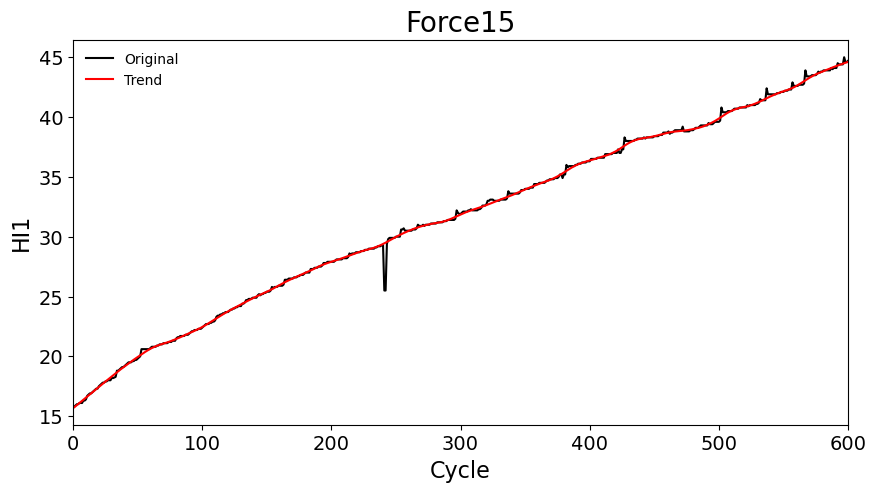

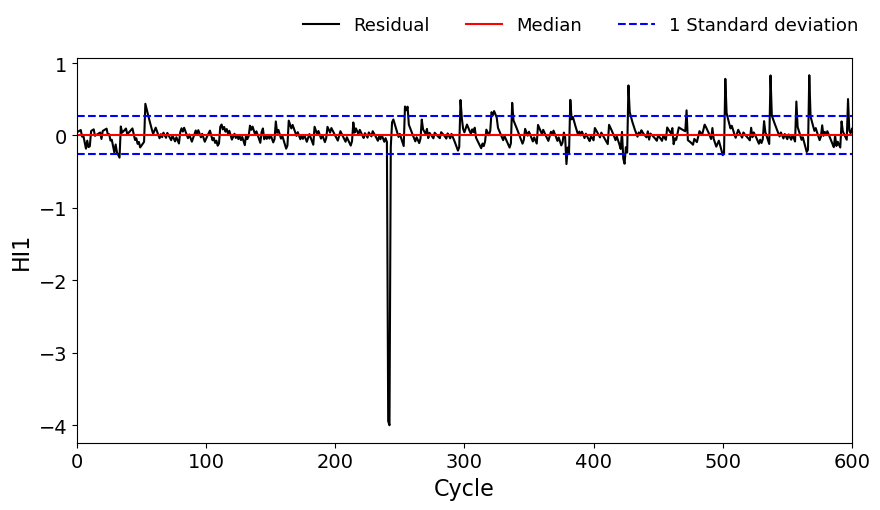

32
33
53
54
55
241
242
254
255
256
297
321
322
323
324
337
379
382
423
424
427
428
472
500
502
503
537
538
557
567
597


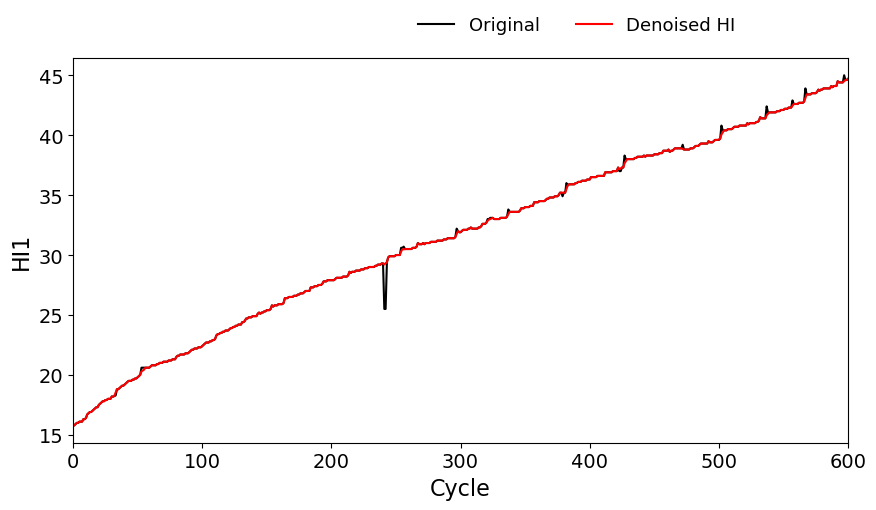

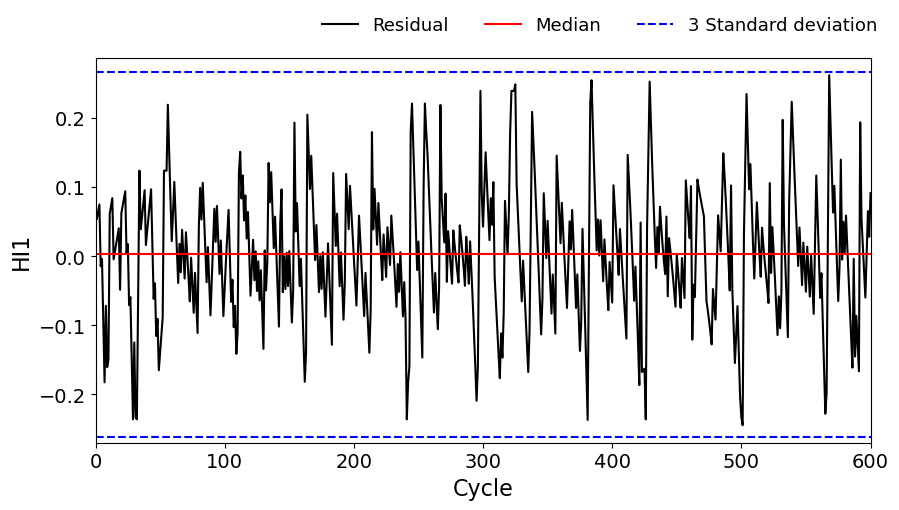

In [56]:
##############################################################
##############################################################

x= data['Cycle']
y= data['max.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    #t=y_res[cycle-1]
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.'].iloc[0]
    else :
        print(cycle)
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'max.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'max.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_max=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_max,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_max-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI1",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_max-y_trend
for t in y_res_2:
    if t>(1*std) or t<-(1*std):
        print("outlier")
    else:
        pass


y_denoised_max=y_trend

(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            WLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     6841.
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:09:46   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.4079     11.946     -4.303      0.0

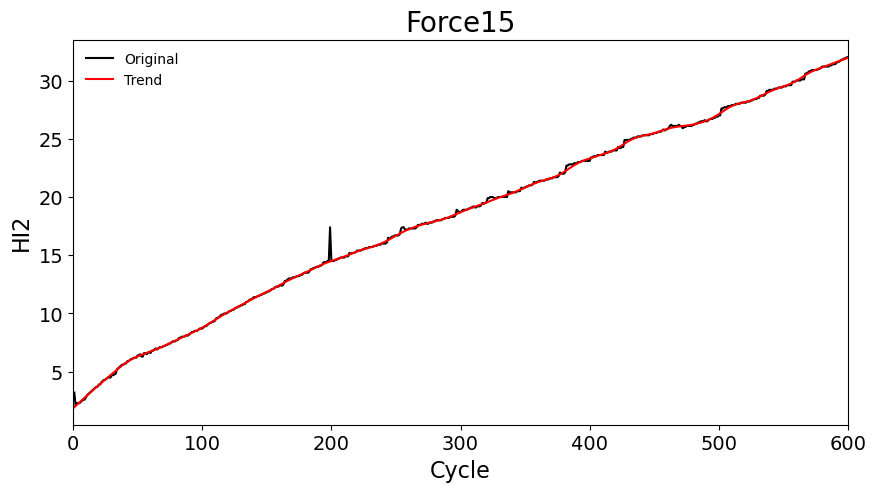

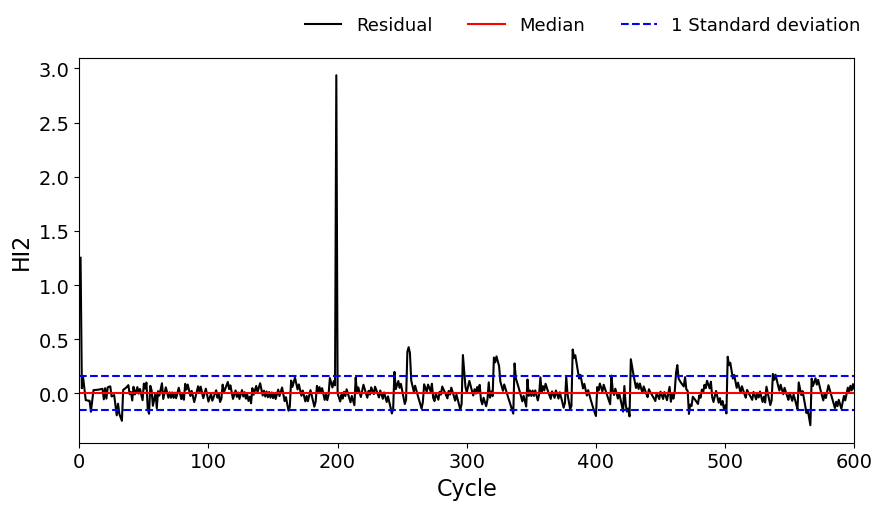

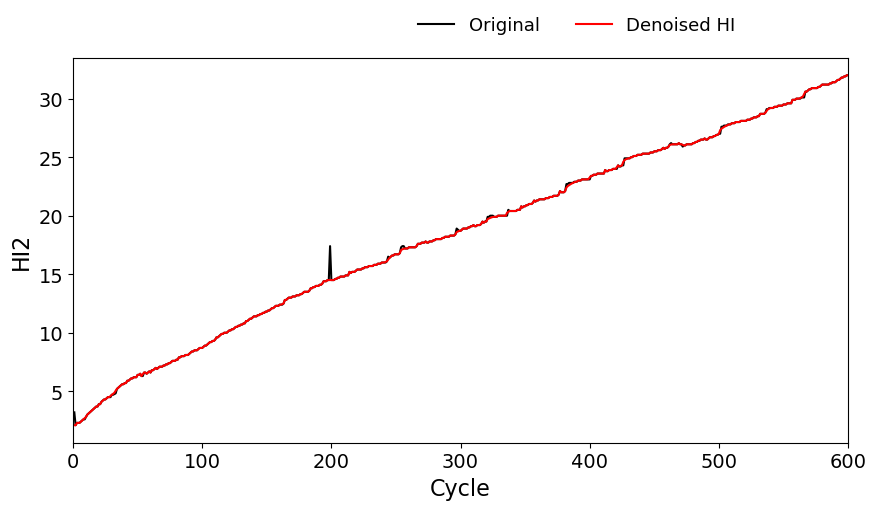

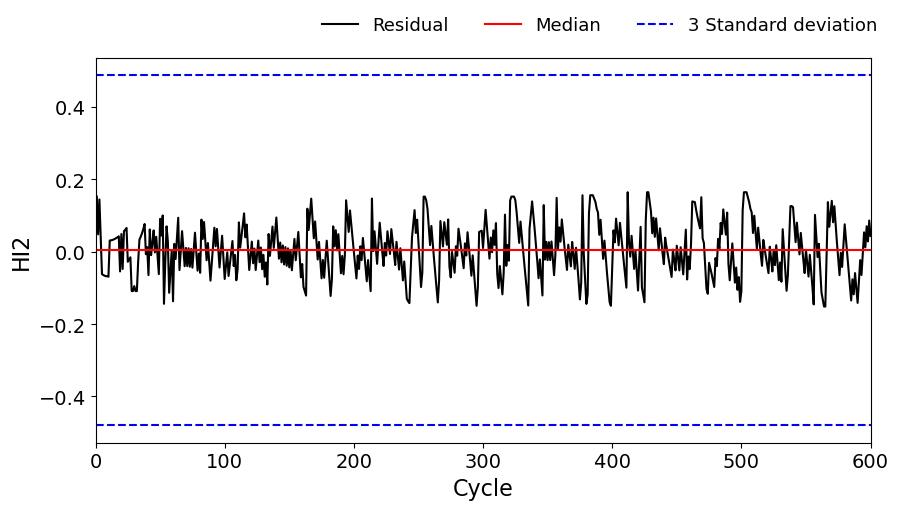

In [57]:
x= data['Cycle']
y= data['min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=data.loc[data['Cycle']==cycle+1,'min.'].iloc[0]
        elif cycle==len(y_res):
            denoised_val=data.loc[data['Cycle']==cycle-1,'min.'].iloc[0]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_min=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_min,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

#########

plt.figure(figsize=(10,5))
plt.plot(x, y_denoised_min-y_trend,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI2",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+3*std,color='blue',linestyle='--',label='3 Standard deviation')
plt.axhline(median-3*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


y_res_2=y_denoised_min-y_trend
for t in y_res_2:
    if t>(3*std) or t<-(3*std):
        print("outlier")
    else:
        pass

    
y_denoised_max=y_trend


(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            WLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.306
Date:                Sun, 24 Mar 2024   Prob (F-statistic):            0.00195
Time:                        20:23:15   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4725     15.377      3.412      0.0

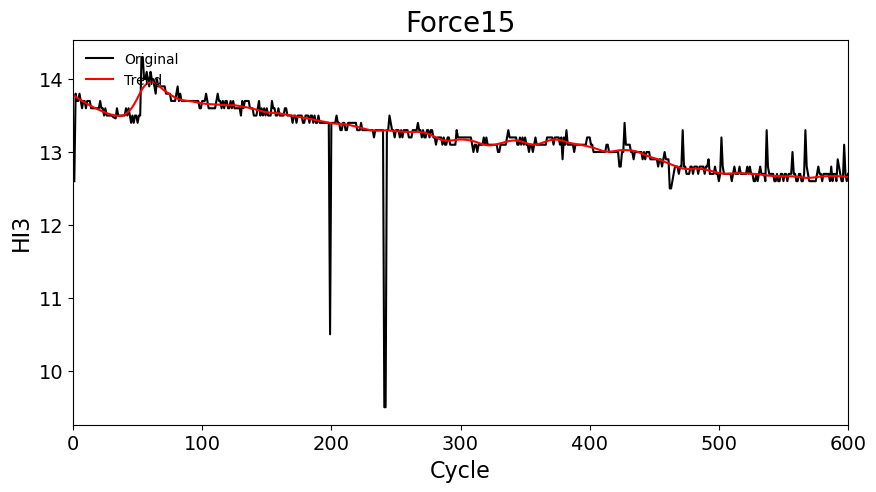

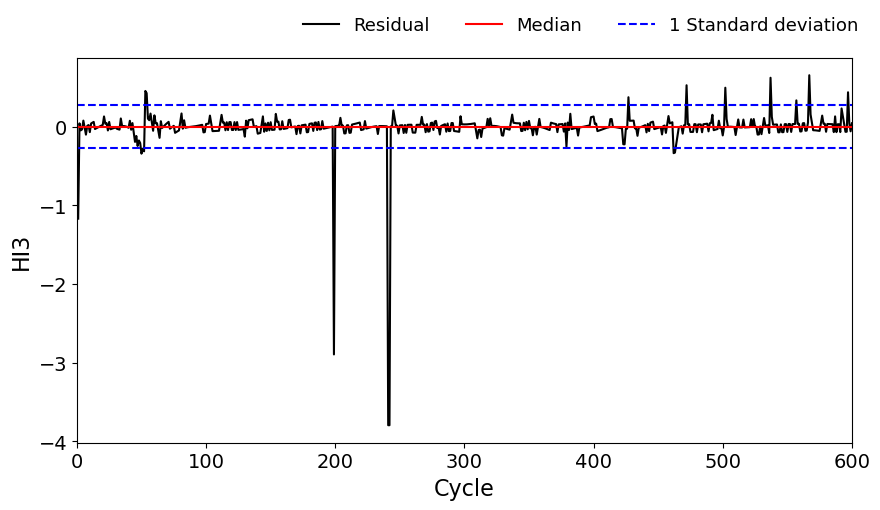

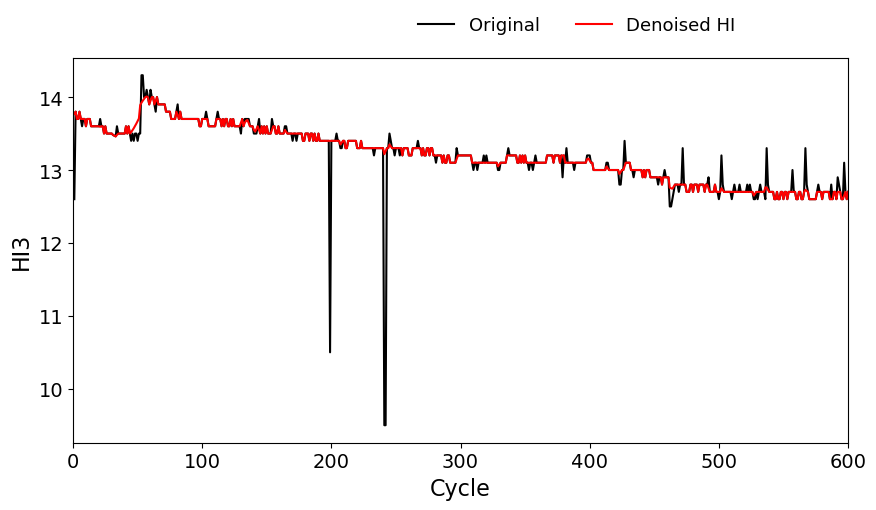

In [121]:
x= data['Cycle']
y= data['max.-min.']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['max.-min.']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-0.3)*std<=t<=median+0.3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'max.-min.'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
           
            
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_maxmin=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_maxmin,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI3",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            WLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     25.03
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.64e-11
Time:                        20:26:53   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0648      2.633     -0.404      0.6

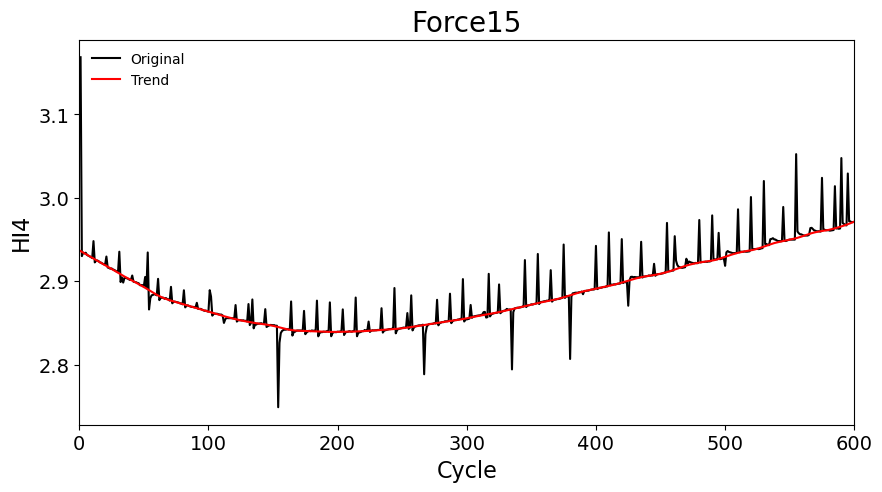

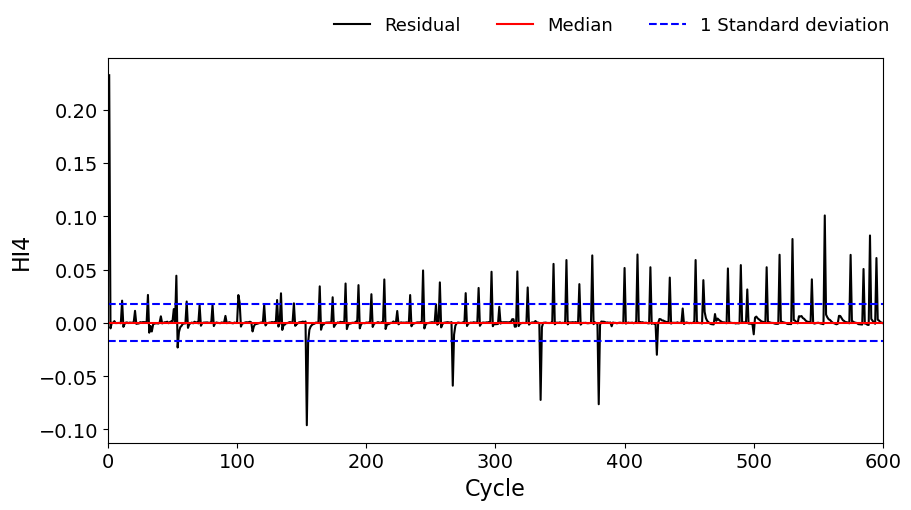

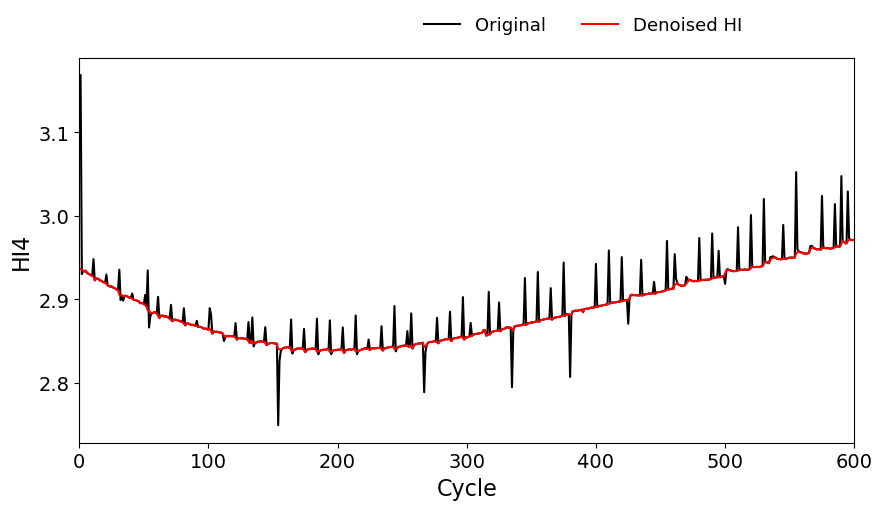

In [143]:
x= data['Cycle']
y= data['CIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-0.3)*std<=t<=median+0.3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_civ=np.array(denoised)
#y_denoised_civ=y_trend

plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_civ,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI4",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            WLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     31.05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.48e-13
Time:                        20:26:38   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5533     47.903     -0.262      0.7

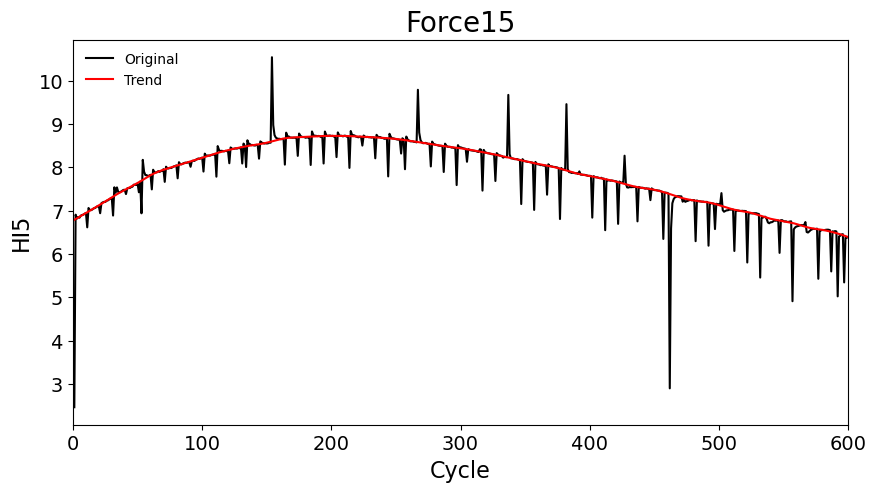

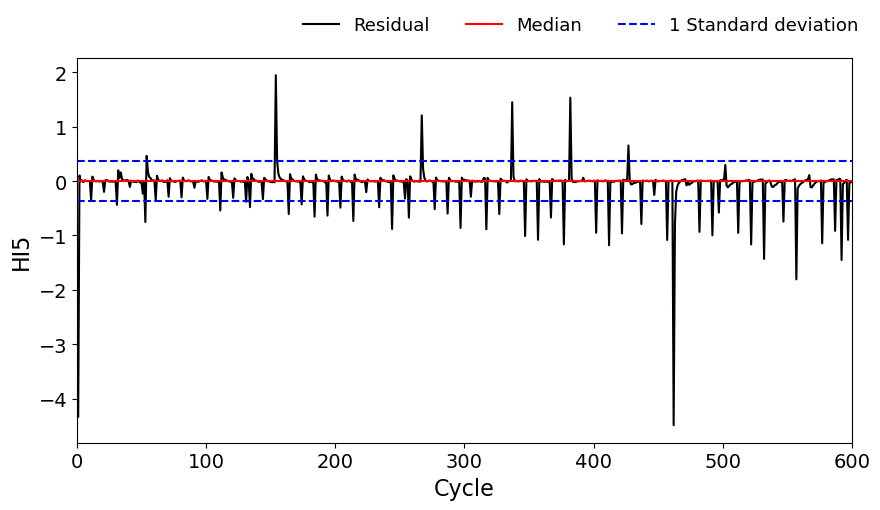

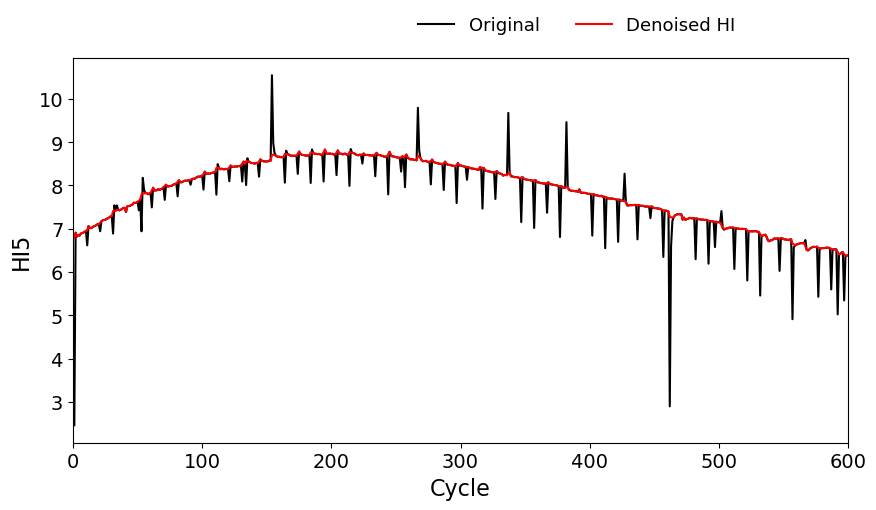

In [142]:
x= data['Cycle']
y= data['CCVIS']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVIS']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-0.3)*std<=t<=median+0.3*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVIS=np.array(denoised)
#y_denoised_CCVIS=y_trend

plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI5",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(600,)
(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.130
Model:                            WLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     44.71
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           8.07e-19
Time:                        20:04:11   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2413      0.346     -0.697      0.4

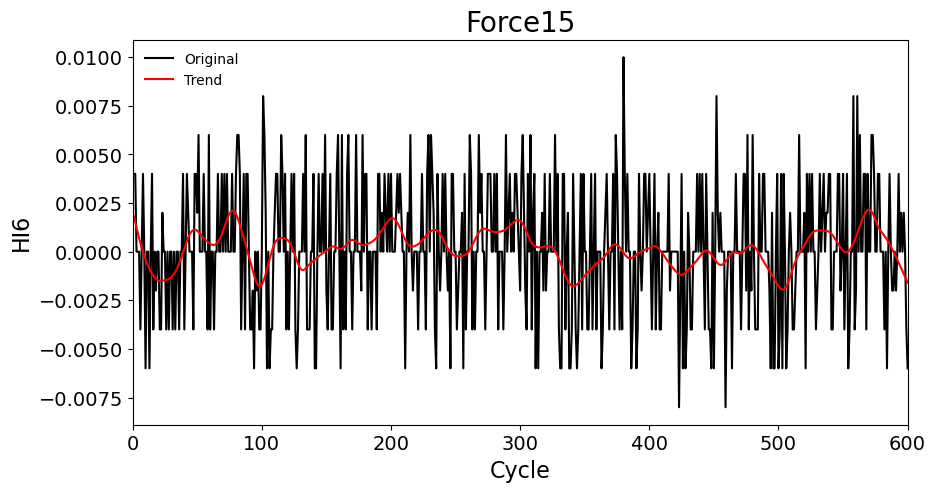

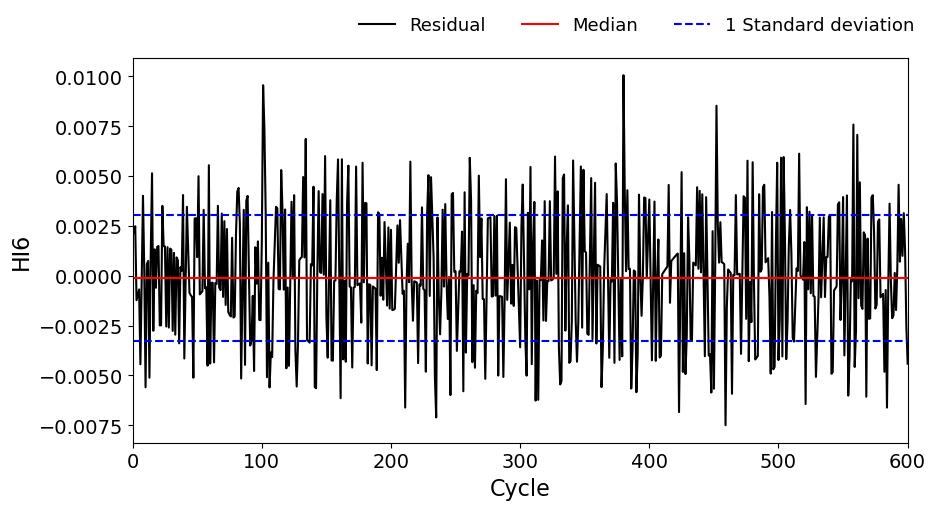

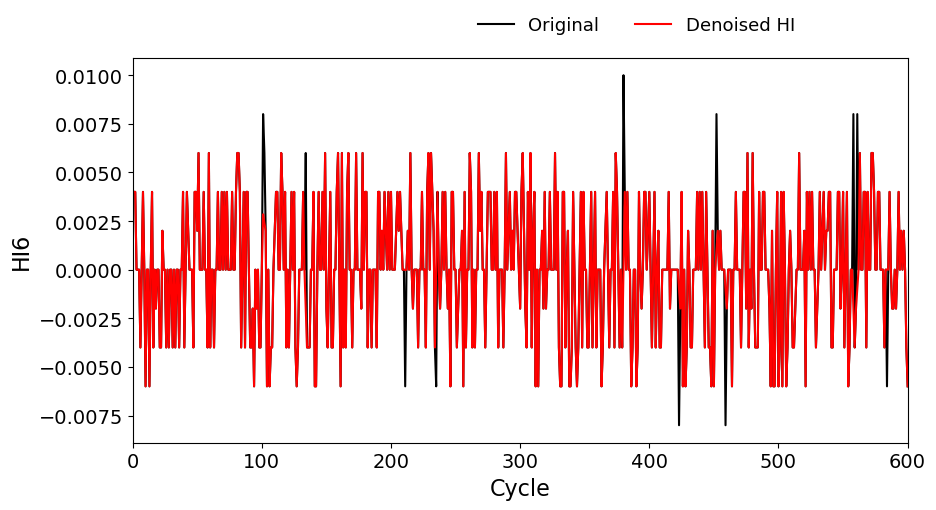

In [11]:
x= data['Cycle']
y= data['CCVES']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['CCVES']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CCVES'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CCVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CCVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI6",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(600,)
(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            WLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     13.31
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.20e-06
Time:                        20:04:26   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.022      0.249      0.8

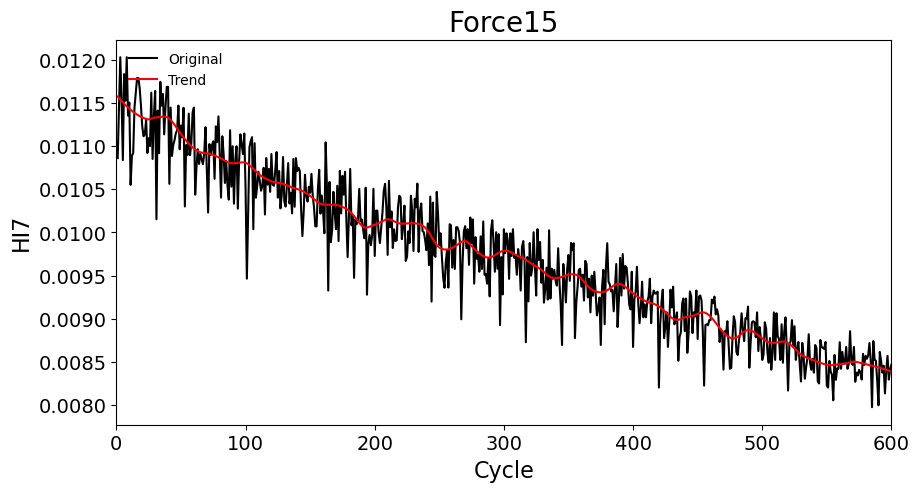

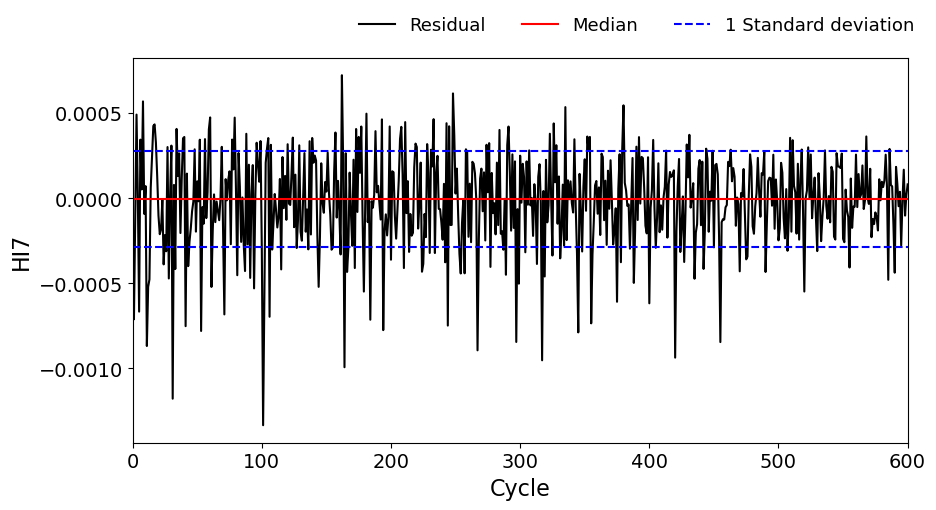

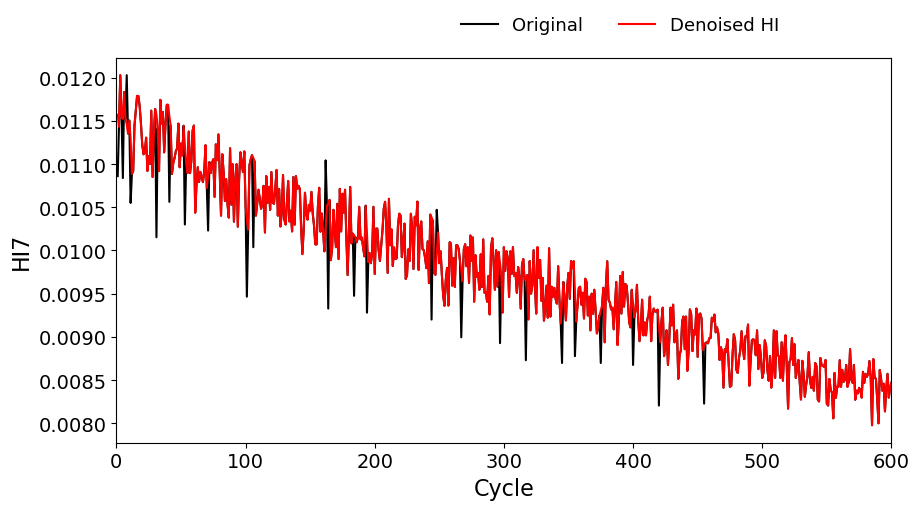

In [12]:
x= data['Cycle']
y= data.iloc[0:,8]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,8]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVIS'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVIS=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVIS,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI7",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(600,)
(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            WLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.306
Date:                Sun, 24 Mar 2024   Prob (F-statistic):            0.00195
Time:                        20:04:41   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0077      0.003     -2.512      0.0

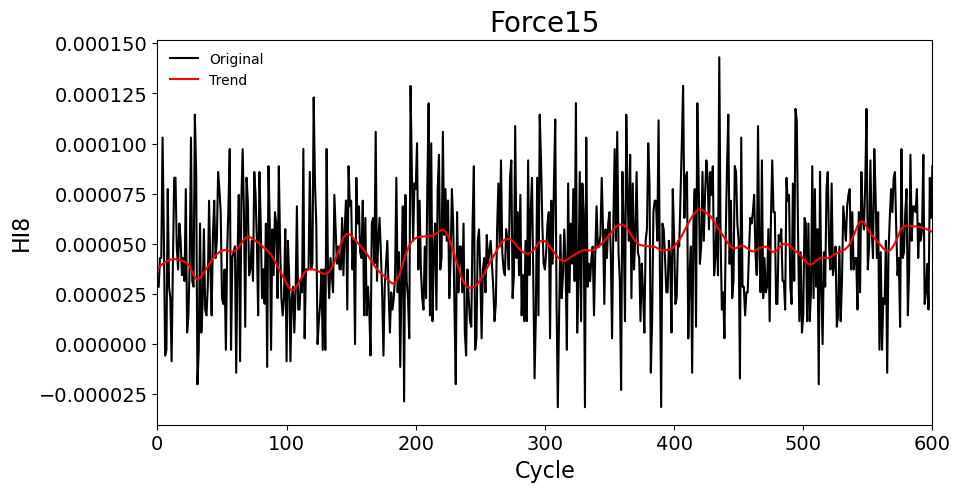

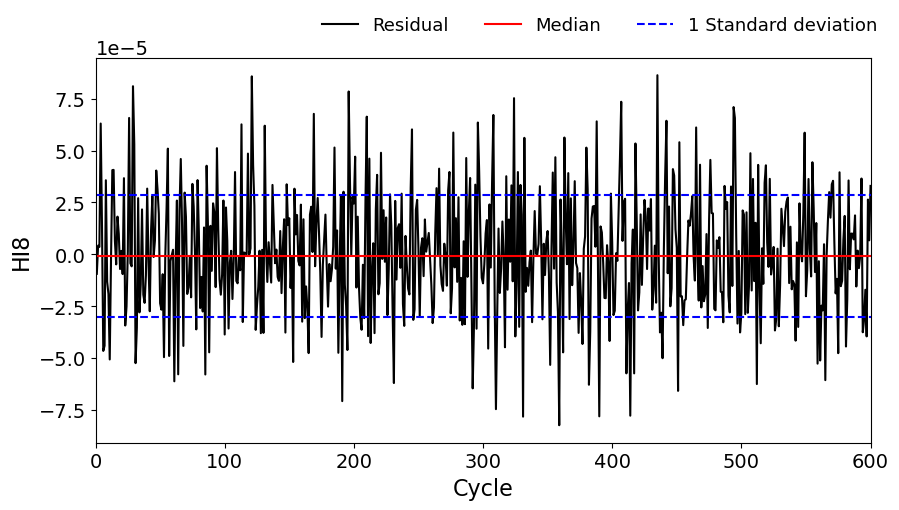

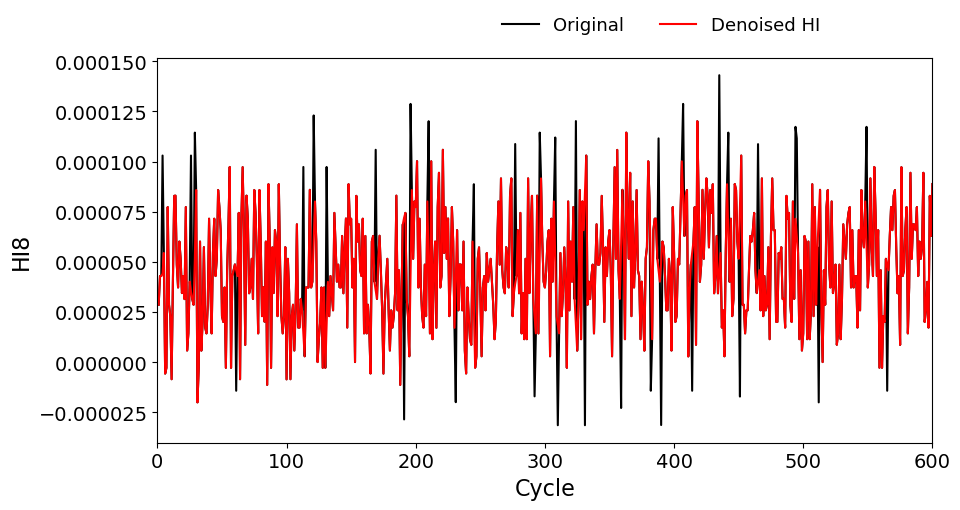

In [13]:
x= data['Cycle']
y= data.iloc[0:,9]

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)
print(y.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data.iloc[0:,9]
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-2)*std<=t<=median+2*std:
        denoised_val=data.loc[data['Cycle']==cycle,'CVES '].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_CVES=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_CVES,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI8",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


(600,)


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\statsmodels\regression\linear_model.py:792: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.450
Model:                            WLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     244.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           2.86e-78
Time:                        20:22:34   Log-Likelihood:                   -inf
No. Observations:                 600   AIC:                               inf
Df Residuals:                     597   BIC:                               inf
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7836      0.216     12.880      0.0

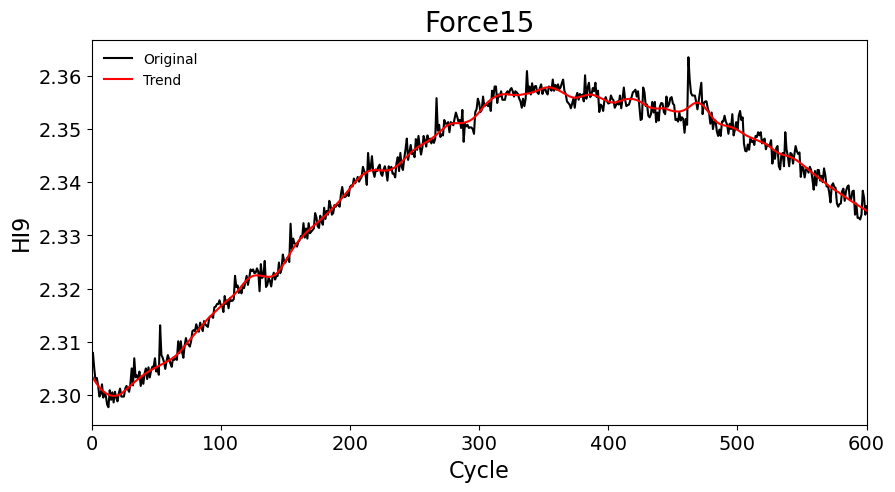

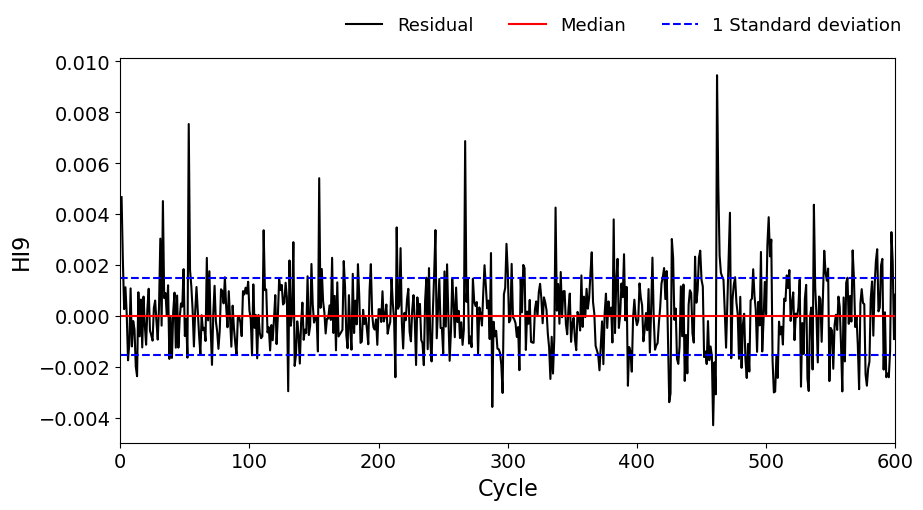

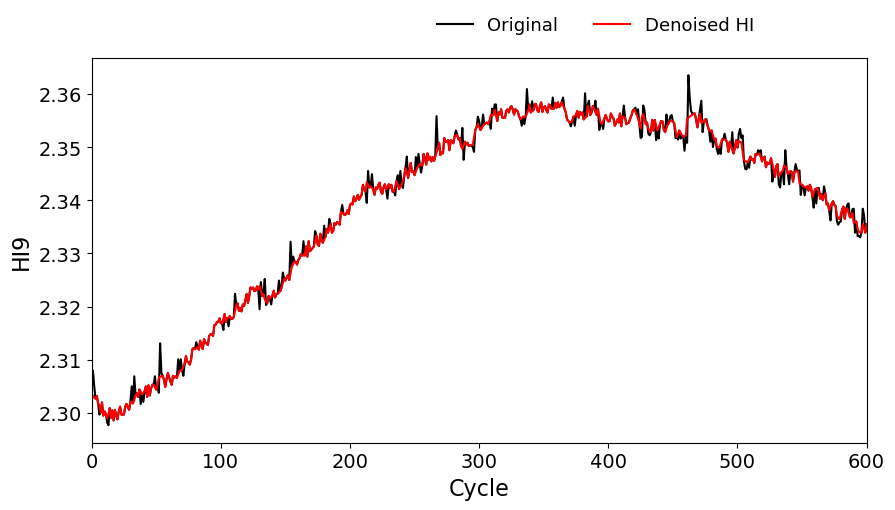

In [120]:
x= data['Cycle']
y= data['DIV']

import statsmodels.api as sm
# RLWR
r=50
count=1

x_s=np.array(x)
y=np.array(y)
fitted_value=[]
print(x_s.shape)



# step1
for t in x_s:
    h=get_n_th_distance(t,x_s,r)
    weights=tricube((t-x_s)/h)
    idx=np.where(weights>0)[0]
    X = np.column_stack((x_s, x_s**2))
    X_const=sm.add_constant(X)
    fit=sm.WLS(y,X_const,weights=weights).fit()
    fitted_val=fit.params[0]+fit.params[1]*t+fit.params[2]*t**2
    fitted_value.append(fitted_val)
    
fitted_value=np.array(fitted_value) 


print(fit.summary())
print(fit.params)
print(fitted_value.shape)

t=5
count=1
while count <= t:
    count +=1
    abs_residual=abs(y-fitted_value)
    s=np.median(abs_residual)
    new_fitted_value=[]
    for x in x_s:
        h=get_n_th_distance(x,x_s,r)
        delta=bisquare((y-fitted_value)/(6*s))
        weights=delta*tricube((x-x_s)/h)
        idx=np.where(weights>0)[0]
        X = np.column_stack((x_s, x_s**2))
        X_const=sm.add_constant(X)
        fit=sm.WLS(y,X_const,weights).fit()
        fitted_val=fit.params[0]+fit.params[1]*x+fit.params[2]*x**2
        new_fitted_value.append(fitted_val)
        
    new_fitted_value=np.array(new_fitted_value)
    fitted_value=new_fitted_value
    
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

x= data['Cycle']
y_origin= data['DIV']
y_trend= fitted_value
y_max=y.max()
y_min=y.min()
y_dat=(y-y_min)/(y_max-y_min)
plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_trend,'r-',label='Trend')
plt.legend(loc='upper left',frameon=False)
plt.title("Force15",fontsize=20)
plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.show()



y_res=y_origin-y_trend

median=np.median(y_res)
std=np.std(y_res)


plt.figure(figsize=(10,5))
plt.plot(x, y_res,'k-', label='Residual')

plt.legend(loc='upper left',frameon=False)

plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])
plt.axhline(median, color='red', linestyle='-', label='Median')
plt.axhline(median+1*std,color='blue',linestyle='--',label='1 Standard deviation')
plt.axhline(median-1*std,color='blue',linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()

median=np.median(y_res)
std=np.std(y_res)

denoised=[]
cycle=1
def closer_number(target, cycle):
    # target에 더 가까운 수 찾기
    return cycle-1 if abs(target - y_res[cycle-2]) < abs(target - y_res[cycle]) else cycle+1

for t in y_res:
    
    if median+(-1)*std<=t<=median+1*std:
        denoised_val=data.loc[data['Cycle']==cycle,'DIV'].iloc[0]
    else :
        if cycle==1:
            denoised_val=y_trend[0]
        elif cycle==len(y_res):
            denoised_val=denoised[-1]
        else :
            denoised_1=y_res[cycle]
            
            minus=denoised-y_trend[:len(denoised)]
            denoised_2=minus[-1]
            target=np.median([denoised_1,denoised_2])
            abs_diff=np.abs(minus-target)
            min_index=np.argmin(abs_diff)
            
            denoised_val=y_trend[cycle-1]+minus[min_index] # 잔차+ 트렌드= 오리지널
    denoised.append(denoised_val)
    cycle +=1

y_denoised_DIV=np.array(denoised)


plt.figure(figsize=(10,5))
plt.plot(x, y_origin,'k-', label='Original')
plt.plot(x,y_denoised_DIV,'r-',label='Denoised HI')



plt.xlabel("Cycle",fontsize=16)
plt.ylabel("HI9",fontsize=16)
plt.xlim([0,len(x)])


plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=13)
plt.show()


In [144]:
df = pd.DataFrame({'HI1': y_denoised_max, 'HI2': y_denoised_min, 'HI3': y_denoised_maxmin,
                  'HI4': y_denoised_civ, 'HI5': y_denoised_CCVIS, 'HI6': y_denoised_CCVES,
                  'HI7': y_denoised_CVIS, 'HI8': y_denoised_CVES, 'HI9': y_denoised_DIV})

print(df)

           HI1   HI2        HI3       HI4       HI5    HI6       HI7  \
0     1.948128   2.1  13.770445  2.936270  6.788031  0.004  0.011571   
1     2.052320   2.1  13.800000  2.935384  6.906000  0.004  0.011432   
2     2.156079   2.3  13.700000  2.934500  6.816000  0.000  0.012027   
3     2.259396   2.3  13.700000  2.933500  6.850000  0.000  0.011537   
4     2.362254   2.3  13.800000  2.934300  6.836000  0.000  0.011521   
..         ...   ...        ...       ...       ...    ...       ...   
595  31.788324  31.8  12.600000  2.972000  6.456000  0.000  0.008400   
596  31.829989  31.9  12.650142  2.971700  6.414137  0.002  0.008573   
597  31.871935  31.9  12.700000  2.970900  6.372000  0.000  0.008297   
598  31.914203  32.0  12.600000  2.971100  6.376000 -0.004  0.008412   
599  31.956830  32.0  12.700000  2.971200  6.386000 -0.006  0.008470   

          HI8       HI9  
0    0.000029  2.303238  
1    0.000043  2.302822  
2    0.000043  2.302700  
3    0.000044  2.303200  
4    

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(df)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_norm_denoised = pd.DataFrame(data_normalized, columns=df.columns)

# 정규화된 데이터 확인
data_norm_denoised.head()

,HI1,HI2,HI3,HI4,HI5,HI6,HI7,HI8,HI9
0,0.000000,0.000000,0.831206,0.737860,0.169532,0.833333,0.887275,0.347299,0.077533
1,0.003472,0.000000,0.852195,0.731355,0.217604,0.833333,0.853086,0.449278,0.070577
2,0.006930,0.006689,0.781179,0.724872,0.180929,0.500000,1.000000,0.449278,0.068545
3,0.010373,0.006689,0.781179,0.717535,0.194784,0.500000,0.879012,0.457823,0.076904
4,0.013800,0.006689,0.852195,0.723404,0.189079,0.500000,0.875059,0.531289,0.053499


In [147]:
data=pd.read_csv("./data_paper/Swelling15C.csv")

print(data.shape)

# data가 pandas DataFrame이고, shape이 (558, 13)이라고 가정합니다.

# 'cycle', 'soh', 'DVSOC50' 열을 제외하고 나머지 데이터만 유지
# 여기서 'cycle'이 2개 있다고 하셨으니, 구체적인 열 이름이 필요할 수 있습니다.
# 예를 들어, 'cycle1', 'cycle2' 같이 구분이 되어 있다면 아래와 같이 작성합니다.
data_reduced = data.drop(['Unnamed: 0', 'Cycle', 'SOH', 'DVSOC50'], axis=1)

# 결과 확인
print(data_reduced.shape)  # 이제 (558, 9)가 되어야 합니다.
data_reduced.head()

(600, 13)
(600, 9)


,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS,CVES,DIV
0,15.8,3.2,12.6,3.1685,2.460,0.004,0.010860,0.000029,2.3079
1,15.9,2.1,13.8,2.9302,6.906,0.004,0.011432,0.000043,2.3050
2,16.0,2.3,13.7,2.9345,6.816,0.000,0.012027,0.000043,2.3027
3,16.0,2.3,13.7,2.9335,6.850,0.000,0.011537,0.000103,2.3032
4,16.1,2.3,13.8,2.9343,6.836,0.000,0.010837,0.000054,2.3018


In [148]:
# 예제 데이터프레임 생성 (558, 9) 형태라고 가정
# data = pd.DataFrame(...)

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 데이터 정규화 수행
data_normalized = scaler.fit_transform(data_reduced)

# 정규화된 데이터를 다시 DataFrame으로 변환
data_normalized = pd.DataFrame(data_normalized, columns=data_reduced.columns)

# 정규화된 데이터 확인
data_normalized.head()

,max.,min.,max.-min.,CIV,CCVIS,CCVES,CVIS,CVES,DIV
0,0.000000,0.036789,0.645833,1.000000,0.000000,0.666667,0.711728,0.344288,0.155015
1,0.003425,0.000000,0.895833,0.431672,0.550111,0.666667,0.853086,0.426207,0.110942
2,0.006849,0.006689,0.875000,0.441927,0.538976,0.444444,1.000000,0.426207,0.075988
3,0.006849,0.006689,0.875000,0.439542,0.543182,0.444444,0.879012,0.770495,0.083587
4,0.010274,0.006689,0.895833,0.441450,0.541450,0.444444,0.706173,0.492086,0.062310


In [149]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
import os
import random


def build_autoencoder(input_dim, encoding_dim):
    # 입력 레이어
    input_layer = Input(shape=(input_dim,))
    
    # 인코더 레이어: 입력을 encoding_dim 차원으로 압축, He 초기화 사용
    encoded = Dense(encoding_dim[0], activation='elu')(input_layer)
    encoded = Dense(encoding_dim[1], activation='elu')(encoded)
    
    # 디코더 레이어: encoding_dim 차원을 다시 입력 차원으로 복원, He 초기화 사용
    decoded = Dense(encoding_dim[0], activation='elu')(encoded)
    decoded = Dense(input_dim, activation='elu')(decoded)
    
    # 오토인코더 모델 생성
    autoencoder = Model(input_layer, decoded)
    
    # 인코더 모델 생성
    encoder = Model(input_layer, encoded)
    
    # 디코더 모델 생성
    encoded_input = Input(shape=(encoding_dim[1],))
    decoder_layer1 = autoencoder.layers[-2](encoded_input)
    decoder_layer2 = autoencoder.layers[-1](decoder_layer1)
    decoder = Model(encoded_input, decoder_layer2)
    
    return autoencoder, encoder, decoder

# 모델 구축
input_dim = 9  # 입력 차원
encoding_dim = [6, 4]  # 인코더의 두 레이어에서의 차원
autoencoder, encoder, decoder = build_autoencoder(input_dim, encoding_dim)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 9)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 60        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_27 (Dense)             (None, 9)                 63        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [150]:
# data.shape는 (558, 9)입니다.

# 첫 277개 행을 훈련 데이터로 사용
X_train = data_norm_denoised
X_test=data_norm_denoised

# 모델 훈련
autoencoder.fit(X_train, X_train, epochs=400, batch_size=32,validation_data=(X_train,X_train))

# 테스트 데이터에 대한 재구성
reconstructed = autoencoder.predict(X_test)




Train on 600 samples, validate on 600 samples
Epoch 1/400
600/600 [==============================] - 0s 552us/sample - loss: 0.2732 - val_loss: 0.2324
Epoch 2/400
600/600 [==============================] - 0s 173us/sample - loss: 0.2030 - val_loss: 0.1729
Epoch 3/400
600/600 [==============================] - 0s 158us/sample - loss: 0.1515 - val_loss: 0.1295
Epoch 4/400
600/600 [==============================] - 0s 97us/sample - loss: 0.1144 - val_loss: 0.0995
Epoch 5/400
600/600 [==============================] - 0s 65us/sample - loss: 0.0897 - val_loss: 0.0800
Epoch 6/400
600/600 [==============================] - 0s 65us/sample - loss: 0.0736 - val_loss: 0.0669
Epoch 7/400
600/600 [==============================] - 0s 63us/sample - loss: 0.0623 - val_loss: 0.0574
Epoch 8/400
600/600 [==============================] - 0s 62us/sample - loss: 0.0538 - val_loss: 0.0500
Epoch 9/400
600/600 [==============================] - 0s 62us/sample - loss: 0.0473 - val_loss: 0.0444
Epoch 10/400
60

600/600 [==============================] - 0s 73us/sample - loss: 0.0106 - val_loss: 0.0106
Epoch 79/400
600/600 [==============================] - 0s 72us/sample - loss: 0.0106 - val_loss: 0.0105
Epoch 80/400
600/600 [==============================] - 0s 75us/sample - loss: 0.0105 - val_loss: 0.0104
Epoch 81/400
600/600 [==============================] - 0s 75us/sample - loss: 0.0104 - val_loss: 0.0104
Epoch 82/400
600/600 [==============================] - 0s 75us/sample - loss: 0.0104 - val_loss: 0.0103
Epoch 83/400
600/600 [==============================] - 0s 77us/sample - loss: 0.0103 - val_loss: 0.0103
Epoch 84/400
600/600 [==============================] - 0s 73us/sample - loss: 0.0102 - val_loss: 0.0102
Epoch 85/400
600/600 [==============================] - 0s 73us/sample - loss: 0.0102 - val_loss: 0.0101
Epoch 86/400
600/600 [==============================] - 0s 73us/sample - loss: 0.0101 - val_loss: 0.0101
Epoch 87/400
600/600 [==============================] - 0s 76us/samp

600/600 [==============================] - 0s 83us/sample - loss: 0.0029 - val_loss: 0.0028
Epoch 156/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0028 - val_loss: 0.0028
Epoch 157/400
600/600 [==============================] - 0s 85us/sample - loss: 0.0028 - val_loss: 0.0028
Epoch 158/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0028 - val_loss: 0.0027
Epoch 159/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0027 - val_loss: 0.0027
Epoch 160/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0027 - val_loss: 0.0027
Epoch 161/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0027 - val_loss: 0.0026
Epoch 162/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0026 - val_loss: 0.0026
Epoch 163/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0026 - val_loss: 0.0026
Epoch 164/400
600/600 [==============================] - 0s 

600/600 [==============================] - 0s 82us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 233/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 234/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 235/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 236/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 237/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 238/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 239/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 240/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 241/400
600/600 [==============================] - 0s 

600/600 [==============================] - 0s 83us/sample - loss: 0.0014 - val_loss: 0.0013
Epoch 310/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 311/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 312/400
600/600 [==============================] - 0s 82us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 313/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 314/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 315/400
600/600 [==============================] - 0s 80us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 316/400
600/600 [==============================] - 0s 80us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 317/400
600/600 [==============================] - 0s 83us/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 318/400
600/600 [==============================] - 0s 

600/600 [==============================] - 0s 78us/sample - loss: 9.5640e-04 - val_loss: 9.4792e-04
Epoch 386/400
600/600 [==============================] - 0s 82us/sample - loss: 9.5801e-04 - val_loss: 9.4857e-04
Epoch 387/400
600/600 [==============================] - 0s 82us/sample - loss: 9.5791e-04 - val_loss: 9.4514e-04
Epoch 388/400
600/600 [==============================] - 0s 82us/sample - loss: 9.5226e-04 - val_loss: 9.4766e-04
Epoch 389/400
600/600 [==============================] - 0s 82us/sample - loss: 9.5703e-04 - val_loss: 9.5605e-04
Epoch 390/400
600/600 [==============================] - 0s 82us/sample - loss: 9.5740e-04 - val_loss: 9.4764e-04
Epoch 391/400
600/600 [==============================] - 0s 82us/sample - loss: 9.4628e-04 - val_loss: 9.3714e-04
Epoch 392/400
600/600 [==============================] - 0s 83us/sample - loss: 9.4011e-04 - val_loss: 9.3778e-04
Epoch 393/400
600/600 [==============================] - 0s 82us/sample - loss: 9.4604e-04 - val_loss:

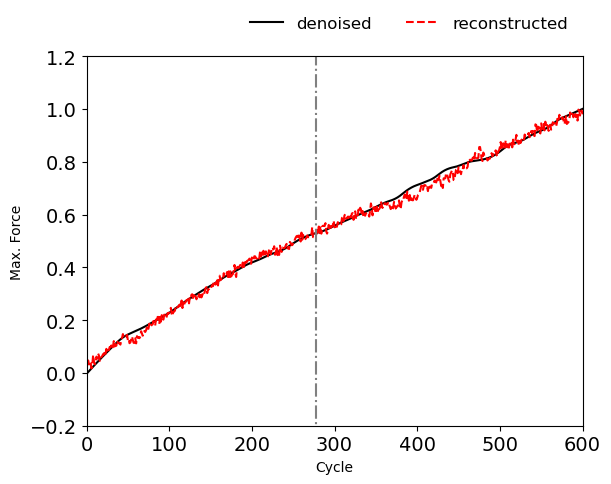

In [151]:

y= reconstructed[:,0]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI1']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

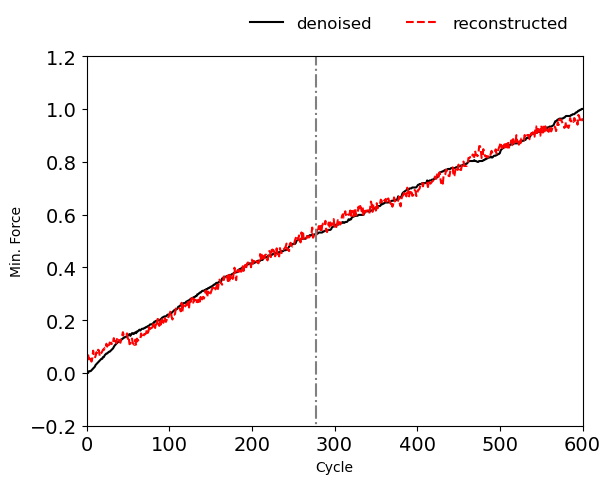

In [152]:
y= reconstructed[:,1]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI2']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

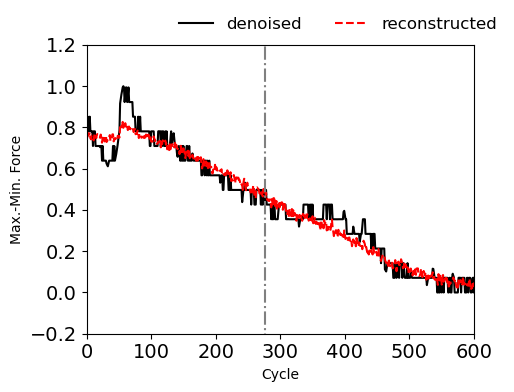

In [153]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,2]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI3']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("Max.-Min. Force")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

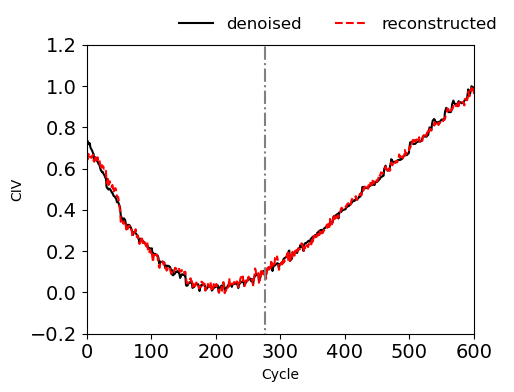

In [154]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,3]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI4']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("CIV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

<Figure size 500x375 with 0 Axes>

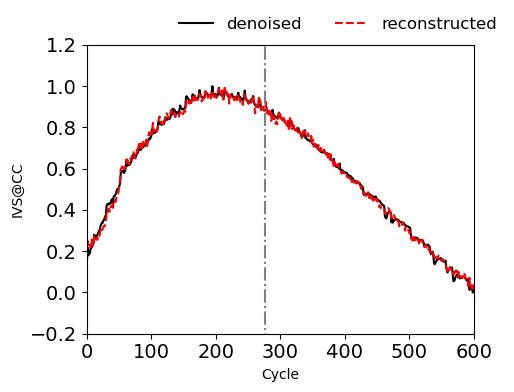

In [155]:
plt.figure(figsize=(5,3.75))
plt.figure(figsize=(5,3.75))
y= reconstructed[:,4]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI5']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("IVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

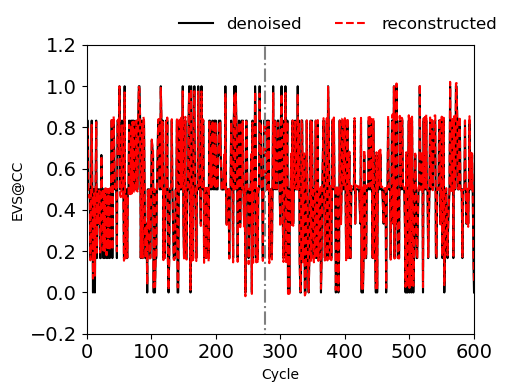

In [156]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,5]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI6']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("EVS@CC")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

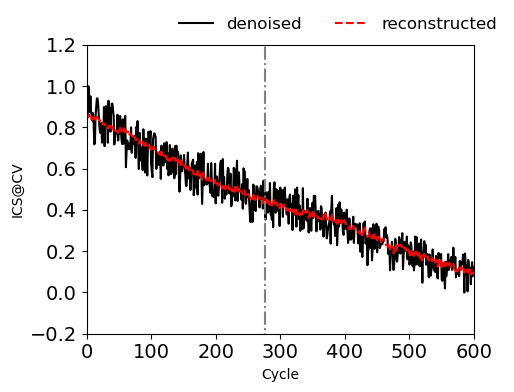

In [157]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,6]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI7']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ICS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

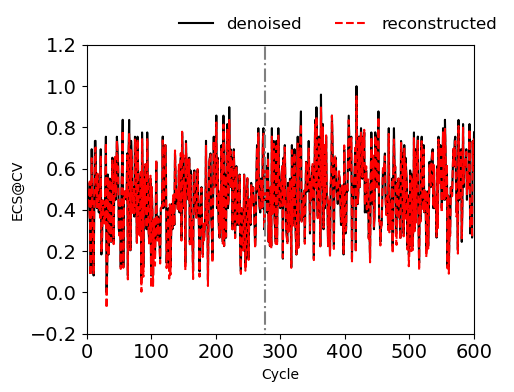

In [158]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,7]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI8']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("ECS@CV")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

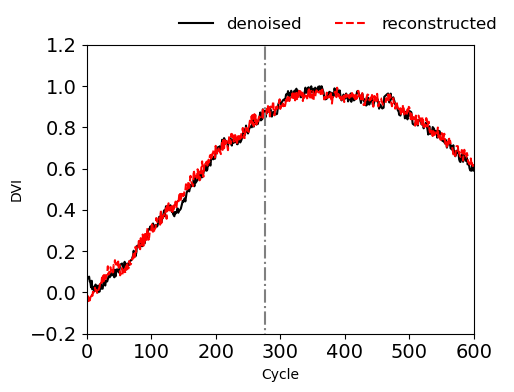

In [159]:
plt.figure(figsize=(5,3.75))
y= reconstructed[:,8]
x= np.arange(1, len(y) + 1)
y_ori=data_norm_denoised['HI9']
plt.plot(x,y_ori,'k-',label='denoised')
plt.plot(x,y,'r--',label='reconstructed')

plt.xlabel("Cycle")
plt.ylabel("DVI")
plt.xlim([0,len(x)])
plt.ylim(-0.2,1.2)
plt.axvline(277,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='upper center', bbox_to_anchor=(0.65,1.15),ncol=3, frameon=False,fontsize=12)
plt.show()

In [160]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel

x=reconstructed
y=data['SOH']*100

x_train=x[:320,:]
y_train=y[:320]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_pred, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_pred))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 2.085867106631922


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [161]:
x=reconstructed[:,:3]
y=data['SOH']*100

x_train=x[:320,:]
y_train=y[:320]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_mechanical, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_mechanical))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 2.7784204851218797


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


In [162]:
x=reconstructed[:,3:]
y=data['SOH']*100

x_train=x[:320,:]
y_train=y[:320]

kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e1))

# GPR 모델 생성 및 학습
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=False)
gp.fit(x_train, y_train)

# SOH 추정
y_Impedance, sigma = gp.predict(x, return_std=True)

from sklearn.metrics import mean_squared_error
from math import sqrt

# 실제 SOH 값(y)과 예측된 SOH 값(y_pred)을 사용하여 RMSE 계산
rmse = sqrt(mean_squared_error(y, y_Impedance))

print("RMSE:", rmse)

C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 3.0272785296410083


C:\Users\tlsdu\anaconda3\envs\tfgpu\lib\site-packages\sklearn\gaussian_process\kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


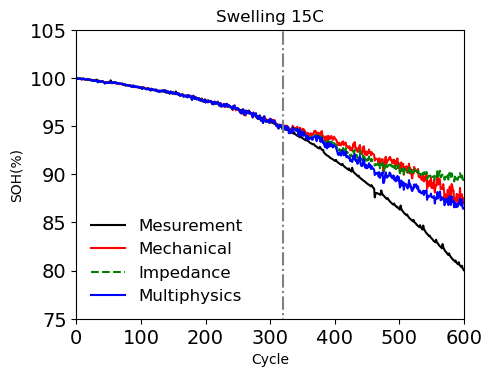

In [163]:
plt.figure(figsize=(5,3.75))
y_2= y_mechanical
y_4=y_pred
y_3=y_Impedance
x= np.arange(1, len(y) + 1)
y_soh=data['SOH']*100
plt.plot(x,y_soh,'k-',label='Mesurement')
plt.plot(x,y_2,'r-',label='Mechanical')
plt.plot(x,y_3,'g--',label='Impedance')
plt.plot(x,y_4,'b-',label='Multiphysics')

plt.title("Swelling 15C")
plt.xlabel("Cycle")
plt.ylabel("SOH(%)")
plt.xlim([0,len(x)])
plt.ylim(75,105)
plt.axvline(320,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='lower left',frameon=False,fontsize=12)
plt.show()



In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
x=reconstructed
y=data['SOH']



x_train=x[:320,:]
y_train=y[:320]



# MLP 모델 구성
mlp_model = Sequential([
    Flatten(input_shape=(9,)),  # 9개의 특성을 가진 데이터를 평탄화
    Dense(16, activation='elu'),  # 첫 번째 은닉 레이어
    Dense(64, activation='elu'),  # 두 번째 은닉 레이어
    Dense(32, activation='elu'),  # 세 번째 은닉 레이어
    Dense(1)  # 출력 레이어
])

# 모델 컴파일
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error')

# 모델 요약
mlp_model.summary()

history = mlp_model.fit(x_train, y_train, epochs=500, batch_size=16, validation_split=0.2)
y_mlp= mlp_model.predict(x)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(y, y_mlp))
print("Test RMSE: ", rmse)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense_60 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_61 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 33        
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________
Train on 256 samples, validate on 64 samples
Epoch 1/500
256/256 [==============================] - 0s 1ms/sample - lo

256/256 [==============================] - 0s 121us/sample - loss: 3.0528e-05 - val_loss: 2.1633e-04
Epoch 65/500
256/256 [==============================] - 0s 109us/sample - loss: 2.8881e-05 - val_loss: 2.4474e-04
Epoch 66/500
256/256 [==============================] - 0s 102us/sample - loss: 3.0509e-05 - val_loss: 1.9575e-04
Epoch 67/500
256/256 [==============================] - 0s 113us/sample - loss: 2.8931e-05 - val_loss: 1.8601e-04
Epoch 68/500
256/256 [==============================] - 0s 105us/sample - loss: 2.8176e-05 - val_loss: 3.7313e-04
Epoch 69/500
256/256 [==============================] - 0s 94us/sample - loss: 2.8721e-05 - val_loss: 3.4510e-04
Epoch 70/500
256/256 [==============================] - 0s 102us/sample - loss: 3.3685e-05 - val_loss: 2.8297e-04
Epoch 71/500
256/256 [==============================] - 0s 102us/sample - loss: 2.7330e-05 - val_loss: 2.9401e-04
Epoch 72/500
256/256 [==============================] - 0s 102us/sample - loss: 2.8601e-05 - val_loss:

256/256 [==============================] - 0s 86us/sample - loss: 1.0853e-05 - val_loss: 2.4028e-05
Epoch 137/500
256/256 [==============================] - 0s 86us/sample - loss: 8.6107e-06 - val_loss: 4.0785e-05
Epoch 138/500
256/256 [==============================] - 0s 86us/sample - loss: 1.1029e-05 - val_loss: 1.3205e-05
Epoch 139/500
256/256 [==============================] - 0s 82us/sample - loss: 1.8482e-05 - val_loss: 4.5766e-05
Epoch 140/500
256/256 [==============================] - 0s 86us/sample - loss: 1.7868e-05 - val_loss: 6.6750e-05
Epoch 141/500
256/256 [==============================] - 0s 86us/sample - loss: 1.3365e-05 - val_loss: 6.4340e-05
Epoch 142/500
256/256 [==============================] - 0s 82us/sample - loss: 1.1043e-05 - val_loss: 3.0791e-05
Epoch 143/500
256/256 [==============================] - 0s 86us/sample - loss: 7.8470e-06 - val_loss: 4.3466e-05
Epoch 144/500
256/256 [==============================] - 0s 90us/sample - loss: 7.3625e-06 - val_loss:

Epoch 208/500
256/256 [==============================] - 0s 90us/sample - loss: 6.1618e-06 - val_loss: 1.2140e-05
Epoch 209/500
256/256 [==============================] - 0s 86us/sample - loss: 1.2468e-05 - val_loss: 8.2438e-06
Epoch 210/500
256/256 [==============================] - 0s 86us/sample - loss: 6.2525e-06 - val_loss: 9.1095e-06
Epoch 211/500
256/256 [==============================] - 0s 86us/sample - loss: 6.6283e-06 - val_loss: 9.3498e-06
Epoch 212/500
256/256 [==============================] - 0s 90us/sample - loss: 4.2746e-06 - val_loss: 2.0302e-05
Epoch 213/500
256/256 [==============================] - 0s 90us/sample - loss: 4.4678e-06 - val_loss: 1.1367e-05
Epoch 214/500
256/256 [==============================] - 0s 86us/sample - loss: 3.6409e-06 - val_loss: 1.3093e-05
Epoch 215/500
256/256 [==============================] - 0s 86us/sample - loss: 5.0184e-06 - val_loss: 2.5158e-05
Epoch 216/500
256/256 [==============================] - 0s 86us/sample - loss: 6.5671e-

Epoch 280/500
256/256 [==============================] - 0s 74us/sample - loss: 5.2172e-06 - val_loss: 2.5005e-05
Epoch 281/500
256/256 [==============================] - 0s 78us/sample - loss: 5.0804e-06 - val_loss: 1.2556e-05
Epoch 282/500
256/256 [==============================] - 0s 78us/sample - loss: 7.3256e-06 - val_loss: 1.1007e-05
Epoch 283/500
256/256 [==============================] - 0s 78us/sample - loss: 1.2320e-05 - val_loss: 3.0429e-05
Epoch 284/500
256/256 [==============================] - 0s 74us/sample - loss: 2.7382e-05 - val_loss: 2.3483e-05
Epoch 285/500
256/256 [==============================] - 0s 74us/sample - loss: 1.3526e-05 - val_loss: 8.6243e-06
Epoch 286/500
256/256 [==============================] - 0s 74us/sample - loss: 6.2161e-06 - val_loss: 7.1010e-06
Epoch 287/500
256/256 [==============================] - 0s 74us/sample - loss: 1.9155e-06 - val_loss: 6.9671e-06
Epoch 288/500
256/256 [==============================] - 0s 74us/sample - loss: 1.0749e-

Epoch 352/500
256/256 [==============================] - 0s 74us/sample - loss: 2.3325e-06 - val_loss: 1.2870e-05
Epoch 353/500
256/256 [==============================] - 0s 74us/sample - loss: 3.8665e-06 - val_loss: 1.0419e-05
Epoch 354/500
256/256 [==============================] - 0s 74us/sample - loss: 2.5566e-06 - val_loss: 7.5402e-06
Epoch 355/500
256/256 [==============================] - 0s 78us/sample - loss: 3.7231e-06 - val_loss: 6.7564e-06
Epoch 356/500
256/256 [==============================] - 0s 78us/sample - loss: 2.4153e-06 - val_loss: 2.1123e-05
Epoch 357/500
256/256 [==============================] - 0s 78us/sample - loss: 5.3103e-06 - val_loss: 1.3670e-05
Epoch 358/500
256/256 [==============================] - 0s 74us/sample - loss: 4.9861e-06 - val_loss: 8.2101e-06
Epoch 359/500
256/256 [==============================] - 0s 74us/sample - loss: 4.1671e-06 - val_loss: 8.9843e-06
Epoch 360/500
256/256 [==============================] - 0s 74us/sample - loss: 2.1849e-

Epoch 424/500
256/256 [==============================] - 0s 86us/sample - loss: 1.2829e-05 - val_loss: 7.2665e-06
Epoch 425/500
256/256 [==============================] - 0s 86us/sample - loss: 1.8424e-05 - val_loss: 3.1298e-05
Epoch 426/500
256/256 [==============================] - 0s 82us/sample - loss: 3.8443e-05 - val_loss: 1.4071e-04
Epoch 427/500
256/256 [==============================] - 0s 86us/sample - loss: 1.2926e-04 - val_loss: 7.9866e-06
Epoch 428/500
256/256 [==============================] - 0s 94us/sample - loss: 2.4130e-05 - val_loss: 1.0638e-05
Epoch 429/500
256/256 [==============================] - 0s 94us/sample - loss: 1.2502e-05 - val_loss: 8.3830e-06
Epoch 430/500
256/256 [==============================] - 0s 90us/sample - loss: 2.0852e-05 - val_loss: 4.6869e-05
Epoch 431/500
256/256 [==============================] - 0s 98us/sample - loss: 1.6588e-05 - val_loss: 2.9649e-05
Epoch 432/500
256/256 [==============================] - 0s 90us/sample - loss: 2.0568e-

Epoch 496/500
256/256 [==============================] - 0s 102us/sample - loss: 1.0422e-05 - val_loss: 1.9398e-05
Epoch 497/500
256/256 [==============================] - 0s 94us/sample - loss: 9.9894e-06 - val_loss: 2.1037e-05
Epoch 498/500
256/256 [==============================] - 0s 94us/sample - loss: 7.3703e-06 - val_loss: 1.1465e-05
Epoch 499/500
256/256 [==============================] - 0s 86us/sample - loss: 1.5723e-05 - val_loss: 2.3322e-05
Epoch 500/500
256/256 [==============================] - 0s 94us/sample - loss: 9.3514e-06 - val_loss: 1.2589e-05
Test RMSE:  0.014527594371430886


In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

x=reconstructed
y=data['SOH']

x_train=x[:320,:]
y_train=y[:320]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x=x.reshape((x.shape[0],x.shape[1],1))


# DCNN 모델 구성
dcnn_model = Sequential([
    Conv1D(filters=8, kernel_size=20, activation='relu', input_shape=(9, 1),padding='same'),  # 첫 번째 컨볼루션 레이어
    #MaxPooling1D(pool_size=2),  # 첫 번째 맥스 풀링 레이어
    Conv1D(filters=8, kernel_size=10, activation='relu',padding='same'),  # 두 번째 컨볼루션 레이어
    #MaxPooling1D(pool_size=2),  # 두 번째 맥스 풀링 레이어
    Flatten(),  # 데이터 평탄화
    Dense(8, activation='relu'),  # 첫 번째 완전연결 레이어
    Dense(8, activation='relu'),  # 두 번째 완전연결 레이어
    Dense(1)  # 출력 레이어
])

# 모델 컴파일
dcnn_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mean_squared_error')

# 모델 요약
dcnn_model.summary()


history = dcnn_model.fit(x_train, y_train, epochs=500, batch_size=16, validation_split=0.3)
y_dcnn= dcnn_model.predict(x)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(y, y_dcnn))
print("Test RMSE: ", rmse)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 9, 8)              168       
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 9, 8)              648       
_________________________________________________________________
flatten_6 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 584       
_________________________________________________________________
dense_54 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 9         
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
____________________________________________________

224/224 [==============================] - 0s 121us/sample - loss: 1.4164e-05 - val_loss: 3.7894e-04
Epoch 65/500
224/224 [==============================] - 0s 116us/sample - loss: 1.3046e-05 - val_loss: 3.4908e-04
Epoch 66/500
224/224 [==============================] - 0s 116us/sample - loss: 1.3141e-05 - val_loss: 3.5511e-04
Epoch 67/500
224/224 [==============================] - 0s 112us/sample - loss: 1.2455e-05 - val_loss: 3.7628e-04
Epoch 68/500
224/224 [==============================] - 0s 116us/sample - loss: 1.2612e-05 - val_loss: 3.6458e-04
Epoch 69/500
224/224 [==============================] - 0s 121us/sample - loss: 1.2137e-05 - val_loss: 3.1321e-04
Epoch 70/500
224/224 [==============================] - 0s 121us/sample - loss: 1.2416e-05 - val_loss: 3.3259e-04
Epoch 71/500
224/224 [==============================] - 0s 121us/sample - loss: 1.2088e-05 - val_loss: 3.6289e-04
Epoch 72/500
224/224 [==============================] - 0s 116us/sample - loss: 1.2376e-05 - val_loss

224/224 [==============================] - 0s 112us/sample - loss: 3.4091e-06 - val_loss: 1.0273e-04
Epoch 136/500
224/224 [==============================] - 0s 116us/sample - loss: 3.1781e-06 - val_loss: 1.0418e-04
Epoch 137/500
224/224 [==============================] - 0s 116us/sample - loss: 3.0096e-06 - val_loss: 1.1246e-04
Epoch 138/500
224/224 [==============================] - 0s 121us/sample - loss: 3.0721e-06 - val_loss: 1.0640e-04
Epoch 139/500
224/224 [==============================] - 0s 116us/sample - loss: 3.3039e-06 - val_loss: 8.6274e-05
Epoch 140/500
224/224 [==============================] - 0s 121us/sample - loss: 3.0084e-06 - val_loss: 1.0181e-04
Epoch 141/500
224/224 [==============================] - 0s 116us/sample - loss: 2.9158e-06 - val_loss: 9.2481e-05
Epoch 142/500
224/224 [==============================] - 0s 116us/sample - loss: 2.9467e-06 - val_loss: 8.8439e-05
Epoch 143/500
224/224 [==============================] - 0s 116us/sample - loss: 3.3932e-06 - 

224/224 [==============================] - 0s 116us/sample - loss: 1.9607e-06 - val_loss: 5.3198e-05
Epoch 207/500
224/224 [==============================] - 0s 116us/sample - loss: 2.0004e-06 - val_loss: 7.2020e-05
Epoch 208/500
224/224 [==============================] - 0s 116us/sample - loss: 2.4163e-06 - val_loss: 5.4969e-05
Epoch 209/500
224/224 [==============================] - 0s 116us/sample - loss: 2.4085e-06 - val_loss: 6.6378e-05
Epoch 210/500
224/224 [==============================] - 0s 121us/sample - loss: 2.0135e-06 - val_loss: 6.2444e-05
Epoch 211/500
224/224 [==============================] - 0s 121us/sample - loss: 2.0301e-06 - val_loss: 5.8682e-05
Epoch 212/500
224/224 [==============================] - 0s 121us/sample - loss: 1.7329e-06 - val_loss: 5.3383e-05
Epoch 213/500
224/224 [==============================] - 0s 116us/sample - loss: 1.6531e-06 - val_loss: 4.3819e-05
Epoch 214/500
224/224 [==============================] - 0s 112us/sample - loss: 2.0244e-06 - 

224/224 [==============================] - 0s 116us/sample - loss: 1.7352e-06 - val_loss: 4.8569e-05
Epoch 278/500
224/224 [==============================] - 0s 112us/sample - loss: 1.6971e-06 - val_loss: 5.9121e-05
Epoch 279/500
224/224 [==============================] - 0s 116us/sample - loss: 2.2779e-06 - val_loss: 4.4133e-05
Epoch 280/500
224/224 [==============================] - 0s 116us/sample - loss: 1.9255e-06 - val_loss: 5.0756e-05
Epoch 281/500
224/224 [==============================] - 0s 116us/sample - loss: 2.2300e-06 - val_loss: 5.0878e-05
Epoch 282/500
224/224 [==============================] - 0s 116us/sample - loss: 2.8287e-06 - val_loss: 4.0679e-05
Epoch 283/500
224/224 [==============================] - 0s 121us/sample - loss: 4.2572e-06 - val_loss: 3.6957e-05
Epoch 284/500
224/224 [==============================] - 0s 112us/sample - loss: 2.0588e-06 - val_loss: 3.7737e-05
Epoch 285/500
224/224 [==============================] - 0s 116us/sample - loss: 3.0260e-06 - 

224/224 [==============================] - 0s 121us/sample - loss: 2.2144e-06 - val_loss: 7.4668e-05
Epoch 349/500
224/224 [==============================] - 0s 116us/sample - loss: 1.9626e-06 - val_loss: 4.9289e-05
Epoch 350/500
224/224 [==============================] - 0s 121us/sample - loss: 2.0065e-06 - val_loss: 6.0601e-05
Epoch 351/500
224/224 [==============================] - 0s 121us/sample - loss: 1.9508e-06 - val_loss: 5.3086e-05
Epoch 352/500
224/224 [==============================] - 0s 116us/sample - loss: 3.6883e-06 - val_loss: 2.6963e-05
Epoch 353/500
224/224 [==============================] - 0s 116us/sample - loss: 4.4867e-06 - val_loss: 2.1051e-05
Epoch 354/500
224/224 [==============================] - 0s 116us/sample - loss: 3.2544e-06 - val_loss: 6.1044e-05
Epoch 355/500
224/224 [==============================] - 0s 121us/sample - loss: 4.5740e-06 - val_loss: 5.5303e-05
Epoch 356/500
224/224 [==============================] - 0s 121us/sample - loss: 2.8718e-06 - 

224/224 [==============================] - 0s 129us/sample - loss: 1.3213e-06 - val_loss: 4.2052e-05
Epoch 420/500
224/224 [==============================] - 0s 121us/sample - loss: 4.6018e-06 - val_loss: 1.3840e-05
Epoch 421/500
224/224 [==============================] - 0s 116us/sample - loss: 1.0885e-05 - val_loss: 1.1305e-04
Epoch 422/500
224/224 [==============================] - 0s 121us/sample - loss: 8.1986e-06 - val_loss: 3.1983e-05
Epoch 423/500
224/224 [==============================] - 0s 116us/sample - loss: 3.8543e-06 - val_loss: 4.2476e-05
Epoch 424/500
224/224 [==============================] - 0s 116us/sample - loss: 3.5227e-06 - val_loss: 2.6972e-05
Epoch 425/500
224/224 [==============================] - 0s 121us/sample - loss: 2.7835e-06 - val_loss: 4.6580e-05
Epoch 426/500
224/224 [==============================] - 0s 121us/sample - loss: 1.4718e-06 - val_loss: 5.7324e-05
Epoch 427/500
224/224 [==============================] - 0s 116us/sample - loss: 1.6106e-06 - 

224/224 [==============================] - 0s 121us/sample - loss: 1.9909e-06 - val_loss: 4.2442e-05
Epoch 491/500
224/224 [==============================] - 0s 116us/sample - loss: 2.1379e-06 - val_loss: 4.1650e-05
Epoch 492/500
224/224 [==============================] - 0s 116us/sample - loss: 1.5132e-06 - val_loss: 6.2621e-05
Epoch 493/500
224/224 [==============================] - 0s 121us/sample - loss: 3.7563e-06 - val_loss: 1.0890e-04
Epoch 494/500
224/224 [==============================] - 0s 116us/sample - loss: 7.8123e-06 - val_loss: 3.6624e-05
Epoch 495/500
224/224 [==============================] - 0s 116us/sample - loss: 2.8451e-06 - val_loss: 3.6508e-05
Epoch 496/500
224/224 [==============================] - 0s 116us/sample - loss: 2.1004e-06 - val_loss: 6.6546e-05
Epoch 497/500
224/224 [==============================] - 0s 121us/sample - loss: 5.7288e-06 - val_loss: 4.3745e-05
Epoch 498/500
224/224 [==============================] - 0s 116us/sample - loss: 4.8918e-06 - 

In [186]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

x=reconstructed
y=data['SOH']*100



x_train=x[:320,:]
y_train=y[:320]

# SVM 모델 생성 및 학습
svm_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(x_train, y_train)

# 모델 평가
y_svm = svm_model.predict(x)

# 성능 평가 (RMSE 계산)
rmse = sqrt(mean_squared_error(y, y_svm))
print("Test RMSE: ", rmse)

Test RMSE:  3.3520307619318968


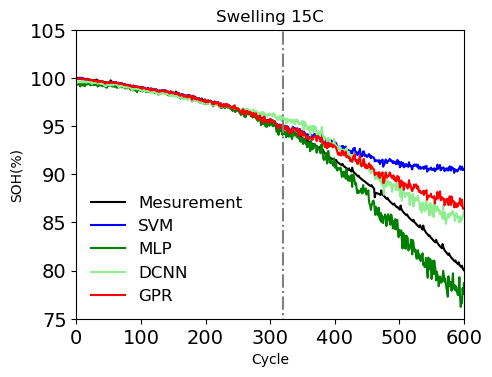

In [192]:
plt.figure(figsize=(5,3.75))
y_2= y_svm
y_4=y_dcnn
y_3=y_mlp
y_6=y_pred
x= np.arange(1, len(y) + 1)
y_soh=y
plt.plot(x,y_soh,'k-',label='Mesurement')
plt.plot(x,y_2,'b-',label='SVM')
plt.plot(x,y_3*100,'g-',label='MLP')
plt.plot(x,y_4*100,color='lightgreen',label='DCNN')
#plt.plot(x,y_5,color='orange',label='GPR')
plt.plot(x,y_6,'r-',label='GPR')


plt.title("Swelling 15C")
plt.xlabel("Cycle")
plt.ylabel("SOH(%)")
plt.xlim([0,len(x)])
plt.ylim(75,105)
plt.axvline(320,-0.2,1.2,color='gray',linestyle='dashdot')
plt.legend(loc='lower left',frameon=False,fontsize=12)
plt.show()

